In [1]:

import numpy as np
import  networkx as nx
import pandas as pd
import arxivscraper
import matplotlib.pyplot as plt
import heapq

#### install and import the numpy pandas arxivscraper and networkx

In [2]:
## Scrape cs education data looking at abstracts that contain education data


In [3]:

#, filters={'abstract':['']}
#get the cs educcation data
scraper = arxivscraper.Scraper(category='cs', date_from='2010-01-01',date_until='2020-01-01',filters={'abstract':['education']})
arx_output_ed = scraper.scrape()




fetching up to  1000 records...
fetching up to  2000 records...
Got 503. Retrying after 30 seconds.
fetching up to  2000 records...
fetching up to  3000 records...
Got 503. Retrying after 30 seconds.
fetching up to  3000 records...
fetching up to  4000 records...
fetching up to  5000 records...
Got 503. Retrying after 30 seconds.
fetching up to  5000 records...
fetching up to  6000 records...
Got 503. Retrying after 30 seconds.
fetching up to  6000 records...
fetching up to  7000 records...
Got 503. Retrying after 30 seconds.
fetching up to  7000 records...
fetching up to  8000 records...
Got 503. Retrying after 30 seconds.
fetching up to  8000 records...
fetching up to  9000 records...
Got 503. Retrying after 30 seconds.
fetching up to  9000 records...
fetching is completed in 331.5 seconds.
Total number of records 49


In [15]:
scraper = arxivscraper.Scraper(category='cs', date_from='2010-01-01',date_until='2020-01-01',filters={'abstract':['artificial ']})
arx_output_ai = scraper.scrape()

fetching up to  1000 records...
fetching up to  2000 records...
Got 503. Retrying after 30 seconds.
fetching up to  2000 records...
fetching up to  3000 records...
Got 503. Retrying after 30 seconds.
fetching up to  3000 records...
fetching up to  4000 records...
Got 503. Retrying after 30 seconds.
fetching up to  4000 records...
fetching up to  5000 records...
Got 503. Retrying after 30 seconds.
fetching up to  5000 records...
fetching up to  6000 records...
Got 503. Retrying after 30 seconds.
fetching up to  6000 records...
fetching up to  7000 records...
Got 503. Retrying after 30 seconds.
fetching up to  7000 records...
fetching up to  8000 records...
Got 503. Retrying after 30 seconds.
fetching up to  8000 records...
fetching is completed in 308.7 seconds.
Total number of records 133


In [4]:
# creating a pandas datagrame with the labels
def get_authors( output):
    cols = ('id', 'title', 'categories', 'abstract', 'doi', 'created', 'updated', 'authors')
    graph_data = pd.DataFrame(output, columns = cols)
    author_list = graph_data["authors"]
    pub_list = graph_data["authors"]
    
    l = []
    for i in author_list:
        u = pd.unique(i)
        l.extend(u)
    author_list = pd.unique(l)
    
    return author_list 
#get top ten authors
def get_top_10( _graph, output):
    page_rank_ = nx.pagerank(_graph)
    top_k = 10
    k_values = sorted(page_rank_.values())[-top_k:] 
    authors_list = get_authors(output)
    a = []
    for i in range(len(k_values)):
        author = list(page_rank_.values()).index(k_values[i])
        a.append(author)
        
        print((i+1), authors_list[author])
        print(" ")

In [5]:
def wrangle_data(output):
    
    #cols = ('id', 'title', 'categories', 'abstract', 'doi', 'created', 'updated', 'authors')
    #graph_data = pd.DataFrame(output, columns = cols)
    cols = ('id', 'title', 'categories', 'abstract', 'doi', 'created', 'updated', 'authors')
    graph_data = pd.DataFrame(output, columns = cols)
    author_list = graph_data["authors"]
    pub_list = graph_data["authors"]
    
    l = []
    for i in author_list:
        u = pd.unique(i)
        l.extend(u)
    author_list = pd.unique(l)
    
    len_list = len(author_list)
    #make adjancey matrix
    adj_mat = np.zeros((len_list ,len_list ))
    for a in range(len(author_list)):
        for r in range(len(pub_list)): 
            if(author_list[a] in pub_list[r]):
                adj_mat[r][a]+=1
                adj_mat[a][r]+=1
    #adj_mat = pd.DataFrame(adj_matrix, columns = author_list, rows = author_list)
    return adj_mat

In [6]:
def make_graph(adj_mat, name): 
    #takes an adjancy matrix returns a graph
    adj_mat_pd = pd.DataFrame(adj_mat)
    G_ed = nx.from_pandas_adjacency(adj_mat_pd)
    G_ed.name = "Graph from pandas adjacency matrix"
    print(nx.info(G_ed))
    #nx.draw(G_ed)

    nx.draw(G_ed, node_size=10, node_color="skyblue", node_shape="s", alpha=0.2, linewidths=30)
    plt.title("%s data of authors as vertices and edges as shared published papers" % (name ))
    plt.show()
    
    return G_ed

In [7]:
def network_measures(G):
    #with a given graph G return network measures
    ev = nx.eigenvector_centrality(G)
    k_1= heapq.nlargest(3, ev.values())
    print("largest eigan vector centralities")
    print(k_1)
    node_k1 = []
    for i in k_1: 
        t = list(ev.keys())[list(ev.values()).index(i)]
        node_k1.append(t)

    bc = nx.betweenness_centrality(G)
    k_2 = heapq.nlargest(3, bc.values())
    print("largest betweeness centralities")
    print(k_2)
    node_k2 = []
    for i in k_2: 
        t = list(bc.keys())[list(bc.values()).index(i)]
        node_k2.append(t)
    print(node_k1, node_k2)
    return node_k1, node_k2

In [8]:
ed_adj_matrix = wrangle_data(arx_output_ed )


Name: Graph from pandas adjacency matrix
Type: Graph
Number of nodes: 120
Number of edges: 130
Average degree:   2.1667


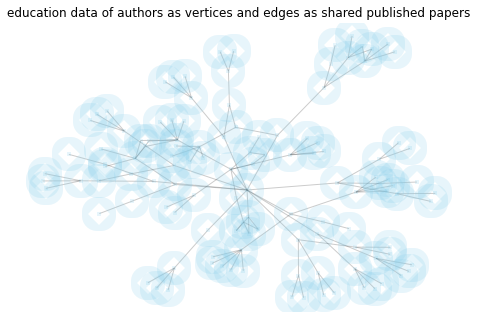

largest eigan vector centralities
[0.6701394382351219, 0.25899427585304247, 0.19349559060869206]
largest betweeness centralities
[0.8732323437849715, 0.28132948094492033, 0.23557897735365332]
[0, 8, 7] [0, 8, 1]
Top authors from eigan vector centrality:
 
renato figueiredo
david lilja
david kaeli
 
Top authors from betweenness centrality:
renato figueiredo
david lilja
p. oscar boykin


In [9]:
ed_adj_matrix = wrangle_data(arx_output_ed )
education_graph = make_graph(ed_adj_matrix, "education")
ev_centrality, between_centralities = network_measures(education_graph)
author_list = get_authors(arx_output_ed)
print("Top authors from eigan vector centrality:")
print(" ")
for i in ev_centrality: 
    print(author_list[i])
print(" ")
print("Top authors from betweenness centrality:")
for j in between_centralities: 
    print(author_list[j])

In [10]:
## GET THE TOP 10 AUTHORS FROM PAGE RANK RANKINGS

In [11]:
get_top_10(education_graph, arx_output_ed)

1 kirill a. sorudeykin
 
2 zhu yu-xi
 
3 bashir ahmad
 
4 r. bhaskaran
 
5 frederic andres
 
6 h. m. mustafa
 
7 david lilja
 
8 n/a najeebullah
 
9 a. al-hamadi
 
10 renato figueiredo
 


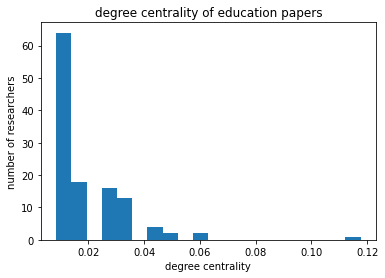

In [12]:
v = nx.degree_centrality(education_graph)
plt.hist(list(v.values()), bins = 20)
plt.title("degree centrality of education papers")
plt.xlabel("degree centrality")
plt.ylabel("number of researchers")
plt.show()


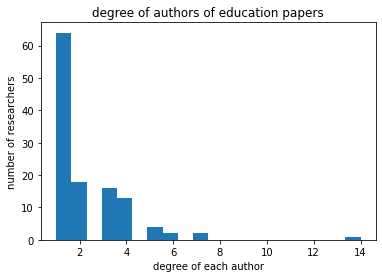

In [13]:
v = nx.degree(education_graph)
degree_values = dict(v).values()
plt.hist(list(degree_values), bins = 20)
plt.title("degree of authors of education papers")
plt.xlabel("degree of each author")
plt.ylabel("number of researchers")
plt.show()

Name: Graph from pandas adjacency matrix
Type: Graph
Number of nodes: 250
Number of edges: 344
Average degree:   2.7520


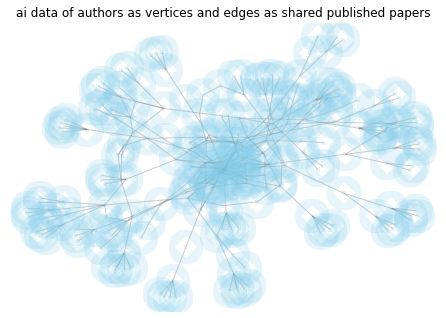

largest eigan vector centralities
[0.6038402778852593, 0.3473868554169063, 0.17722599469754088]
largest betweeness centralities
[0.5418248307082634, 0.12866437987686613, 0.12428537420816557]
[11, 16, 30] [11, 16, 34]
1 amittai aviram
 
2 gunanidhi pradhan
 
3 ruhul a. sarker
 
4 j. wiesinger
 
5 floriana gargiulo
 
6 ulf brefeld
 
7 jonathan tapson
 
8 jamie twycross
 
9 julie greensmith
 
10 uwe aickelin
 
Top authors from eigan vector centrality:
 
uwe aickelin
julie greensmith
jamie twycross
 
Top authors from betweenness centrality:
uwe aickelin
julie greensmith
ramadoss janarthanan
top 10 authors from page rank
1 amittai aviram
 
2 gunanidhi pradhan
 
3 ruhul a. sarker
 
4 j. wiesinger
 
5 floriana gargiulo
 
6 ulf brefeld
 
7 jonathan tapson
 
8 jamie twycross
 
9 julie greensmith
 
10 uwe aickelin
 


In [16]:
ai_adj_matrix = wrangle_data(arx_output_ai )
ai_graph = make_graph(ai_adj_matrix, "ai")
ev_centrality, between_centralities = network_measures(ai_graph)
author_list = get_authors(arx_output_ai)
get_top_10(ai_graph, arx_output_ai)
print("Top authors from eigan vector centrality:")
print(" ")
for i in ev_centrality: 
    print(author_list[i])
print(" ")
print("Top authors from betweenness centrality:")
for j in between_centralities: 
    print(author_list[j])
print("top 10 authors from page rank")
get_top_10(ai_graph, arx_output_ai)

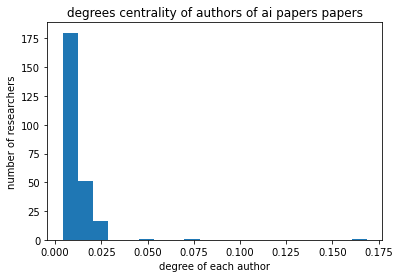

In [17]:
#nx.optimal_edit_paths(education_graph, ai_graph)

v = nx.degree_centrality(ai_graph)
plt.hist(list(v.values()), bins = 20)
plt.title("degrees centrality of authors of ai papers papers")
plt.xlabel("degree of each author")
plt.ylabel("number of researchers")
plt.show()



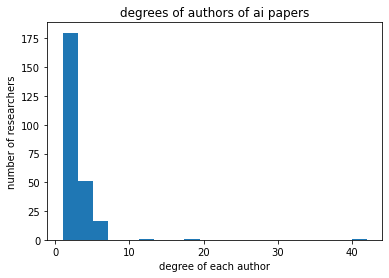

In [18]:
v = nx.degree(ai_graph)
degree_values = dict(v).values()
plt.hist(list(degree_values), bins = 20)
plt.title("degrees of authors of ai papers")
plt.xlabel("degree of each author")
plt.ylabel("number of researchers")
plt.show()

In [ ]:

# analysis: the measures of centrality of both types of research are roughly the same 


In [19]:
def similarity_matrix(a_matrix):
    lamb_da = np.linalg.eigvals(a_matrix)
    eig = (1)/max(lamb_da)
    I = np.identity(len(a_matrix))
    A = a_matrix
    relational_matrix = (I - (A* eig)) 
    relational_matrix = np.linalg.inv(relational_matrix)
    
    return relational_matrix


In [ ]:
#r_ai = similarity_matrix(ai_adj_mat)
r_ed = similarity_matrix(ed_adj_mat)


In [ ]:

#attempted to create a graphical representation of a relational matrix but coudln't
from scipy.stats import kde
def sim_hist(a):
    nbins=300
    xy = np.vstack((a[0,:], a[1,:]))
    k = kde.gaussian_kde(xy)
    xi, yi = np.mgrid[a[0].min():a[1].max():nbins*1j, a[1].min():a[1].max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    # Make the plot
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
    plt.show()

    # Change color palette
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.Greens_r)
    plt.show()
  
    plt.hexbin(A)